# 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# 2. Load dataset

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

c:\Users\phat0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# view dataset characteristics
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
print("boston_dataset.data.shape: {}".format(boston_dataset.data.shape)) 
print("Number of samples: {}".format(len(boston_dataset.target)))
print("Features: {}" .format(boston_dataset.feature_names))

boston_dataset.data.shape: (506, 13)
Number of samples: 506
Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# 3. Load the dataset into data frame

In [33]:
# save features
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# save target
y = pd.DataFrame(boston_dataset.target,) # df [, 1]

In [24]:
X.shape, y.shape

((506, 13), (506, 1))

In [21]:
# Get name columns
columns = boston_dataset.feature_names.tolist() + ['MEDV']

df = pd.DataFrame(np.hstack([X,y]), columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [36]:
df.shape

(506, 14)

In [20]:
df[['RM','target']].head(10), df[['RM','target']].tail(10)

(      RM  target
 0  6.575    24.0
 1  6.421    21.6
 2  7.185    34.7
 3  6.998    33.4
 4  7.147    36.2
 5  6.430    28.7
 6  6.012    22.9
 7  6.172    27.1
 8  5.631    16.5
 9  6.004    18.9,
         RM  target
 496  5.390    19.7
 497  5.794    18.3
 498  6.019    21.2
 499  5.569    17.5
 500  6.027    16.8
 501  6.593    22.4
 502  6.120    20.6
 503  6.976    23.9
 504  6.794    22.0
 505  6.030    11.9)

In [37]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Method 2 Load data 

In [100]:
data = pd.DataFrame(boston_dataset.data)
data.columns = boston_dataset.feature_names
data['target']=boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 4. Exploratory Data Analysis (EDA)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
df.shape

(506, 14)

Check distinct

In [50]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64

Check for mising value 

In [55]:
df.isnull().sum() / df.shape[0] * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
target     0.0
dtype: float64

Check for duplicate

In [56]:
df.duplicated().sum()


0

In [60]:
# Print summary statistics
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

c:\Users\phat0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

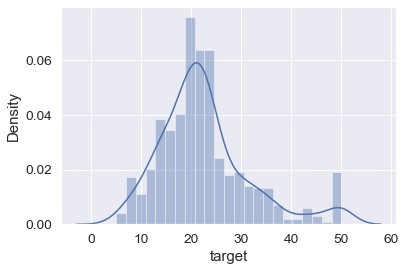

In [64]:
sns.distplot(df['target'])

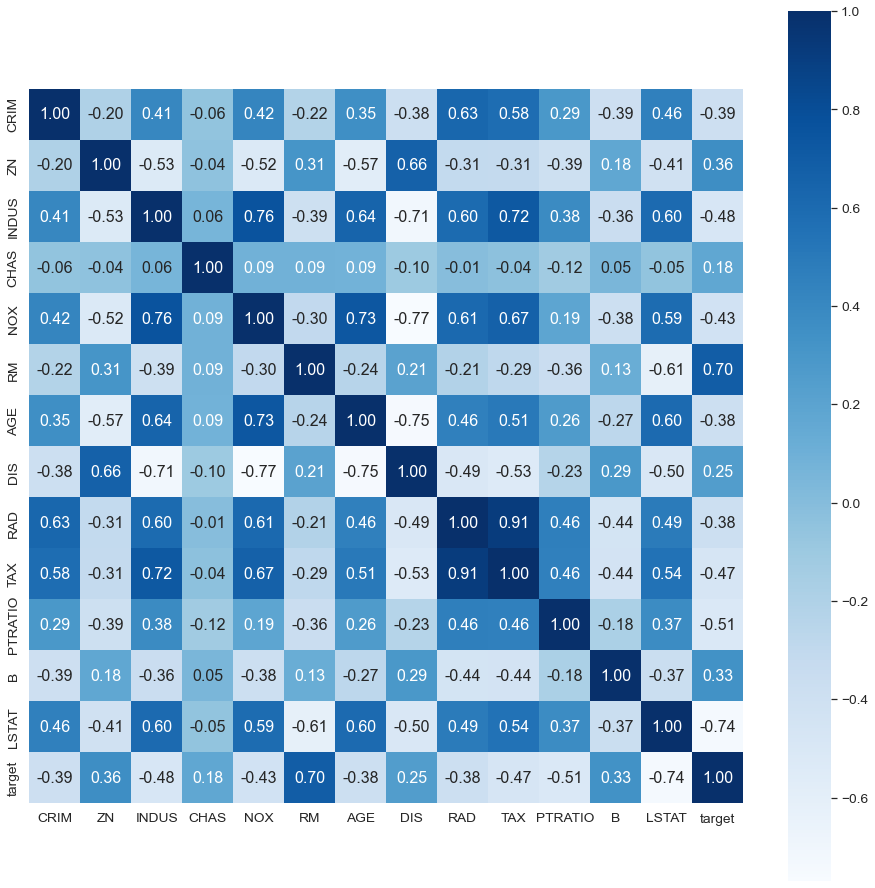

In [88]:
corrmat = df.corr()
plt.subplots(figsize=(16, 16))
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 16}, cmap='Blues')
plt.show()

# 5. List of features to predict house price


### 5.1. Model training on raw dataset

Save file

In [90]:
# save our data into file for future use
df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT','target']].to_csv('./../../python/boston_univariate_rm_raw.csv', index=False)

Model coeff w =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept when fit_intercept=True : 36.45949


C:\Users\phat0\AppData\Local\Temp\ipykernel_16616\3742429561.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_train, y_train, 'bo', color = 'orange')     # observed data


InvalidIndexError: (slice(None, None, None), None)

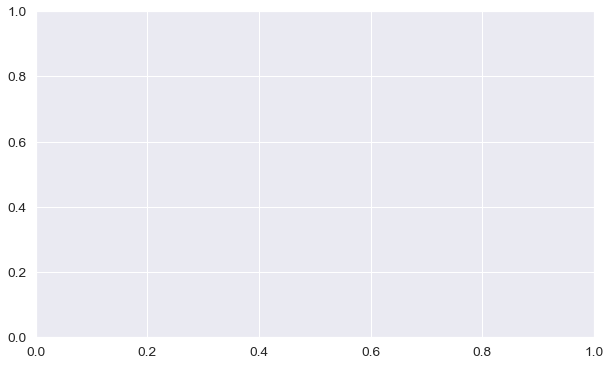

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split

df = pd.read_csv('./../../python/boston_univariate_rm_raw.csv', sep = ',')

X = df.drop(['target'], axis=1)
y = df['target']

# train model on the entire dataset
X_train = X
y_train = y   

### Fitting model to the train set
reg_no_preprocess = LinearRegression(fit_intercept=True) # True means y-intercept will be                                                                                                                                           by the line of best fit

reg_no_preprocess.fit(X_train, y_train)
print('Model coeff w = ', reg_no_preprocess.coef_)
print('Intercept when fit_intercept=True : {:.5f}'.format(reg_no_preprocess.intercept_))

### Draw a regression line 
y_train_predicted = reg_no_preprocess.predict(X_train)

plt.figure(figsize=(10,6))
plt.plot(X_train, y_train, 'bo', color = 'orange')     # observed data
plt.plot(X_train, y_train_predicted, 'r-') # predicted data

# plt.xlabel('13 features')
# plt.ylabel('price (MEDV)')
# plt.show()
